In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.interpolate import interp1d
from numpy.polynomial import Polynomial
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

## Description of the dataset used :-

### The dataset used in this data analysis contains information regarding the smartphones available in the Indian market.

# Reading the Data :-

In [180]:
df=pd.read_csv("smartphone_cleaned_v5.csv")
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [181]:
df.shape

(980, 25)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [183]:
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000


# Cleaning the Dataset and filling the missing values 

## Removing unnecessary columns :-

In [184]:
df = df.drop('rating', axis=1,errors='ignore')
df = df.drop('has_ir_blaster', axis=1,errors='ignore')

## Filling missing values :-

In [185]:
fast_charging_smartphones = df[df['fast_charging_available'] == 1]
median_charging_speed = fast_charging_smartphones['fast_charging'].median()

df.loc[(df['fast_charging_available'] == 0), 'fast_charging'] = df['fast_charging'].fillna(5)
df['fast_charging'] = df['fast_charging'].fillna(median_charging_speed)
df['num_cores']=df['num_cores'].fillna(df['num_cores'].median())
df['processor_speed']=df['processor_speed'].fillna(df['processor_speed'].mean())
df['battery_capacity']=df['battery_capacity'].fillna(df['battery_capacity'].mean())
df['num_front_cameras']=df['num_front_cameras'].fillna(1)
df.loc[(df['brand_name'] == 'samsung'), 'processor_brand'] = df['processor_brand'].fillna('exynos')
df.loc[(df['brand_name'] == 'apple'), 'processor_brand'] = df['processor_brand'].fillna('bionic')
df['processor_brand'] = df['processor_brand'].fillna('dimensity')

scaler = StandardScaler()
df['price_zscore'] = scaler.fit_transform(df[['price']])


In [186]:
df.head(5)

,brand_name,model,price,has_5g,has_nfc,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,price_zscore
0,oneplus,OnePlus 11 5G,54999,True,True,snapdragon,8.0,3.2,5000.0,1,...,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN,0.568908
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,True,False,snapdragon,8.0,2.2,5000.0,1,...,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0,-0.317160
2,samsung,Samsung Galaxy A14 5G,16499,True,False,exynos,8.0,2.4,5000.0,1,...,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0,-0.405488
3,motorola,Motorola Moto G62 5G,14999,True,False,snapdragon,8.0,2.2,5000.0,1,...,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0,-0.443452
4,realme,Realme 10 Pro Plus,24999,True,False,dimensity,8.0,2.6,5000.0,1,...,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN,-0.190362


In [187]:
df.describe()

,price,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,price_zscore
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,500.000000,9.800000e+02
mean,32520.504082,7.773469,2.427217,4817.748194,0.854082,39.214286,6.560204,141.036735,6.536765,92.256122,2.814286,1.029592,50.319286,16.589128,0.630612,736.064000,-1.631348e-17
std,39531.812669,0.834466,0.454026,1003.852459,0.353205,33.659064,2.744378,107.134516,0.349162,28.988052,0.776441,0.169545,33.000968,10.876802,0.482885,366.894911,1.000511e+00
min,3499.000000,4.000000,1.200000,1821.000000,0.000000,5.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000,-7.345052e-01
25%,12999.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000,-4.940697e-01
50%,19994.500000,8.000000,2.400000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,-3.170206e-01
75%,35491.500000,8.000000,2.840000,5000.000000,1.000000,65.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000,7.519293e-02
max,650000.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000,1.562779e+01


## Now that our Dataset is cleaned we can go for the Univariate Analysis.

## 1.Univariate Analysis :-

## A.) Price Distribution :-

Text(0.5, 1.0, 'Z-Score Normalized Price Distribution')

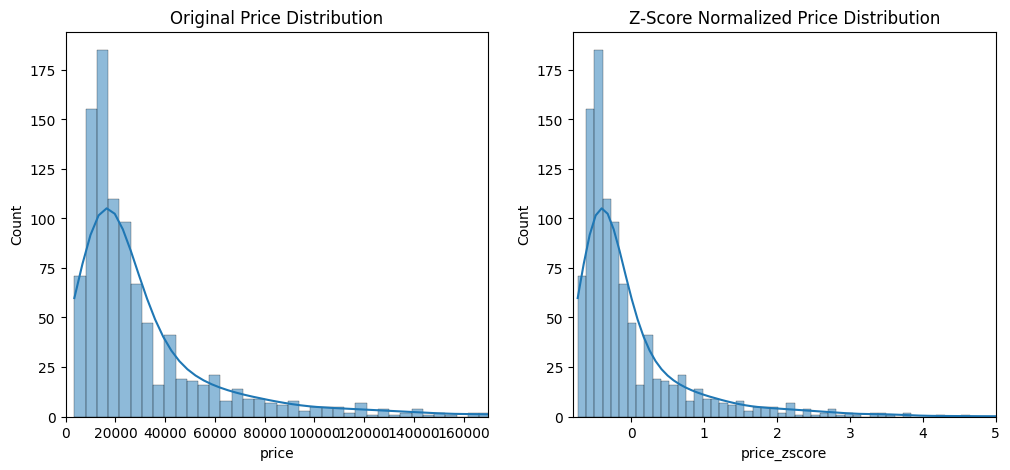

In [188]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.xlim(0, 170000)
plt.title('Original Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['price_zscore'], kde=True)
plt.xlim(-0.8,5 )
plt.title('Z-Score Normalized Price Distribution')



### Price Column Description :-

In [189]:
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

## B.) Premium Segment Breakdown :-

Text(0.5, 1.0, 'Premium Segment Smartphone')

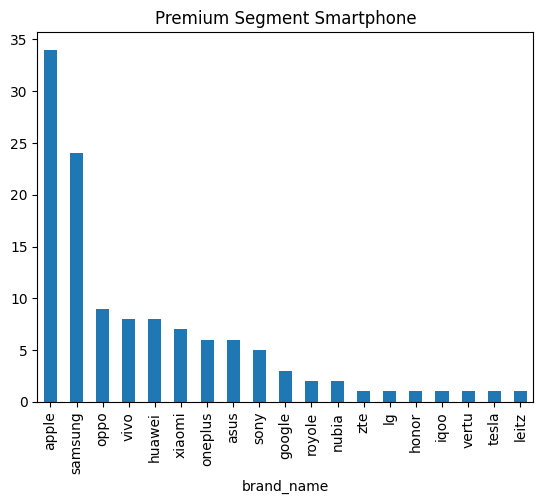

In [190]:
df[df['price']>60000]['brand_name'].value_counts().plot.bar()
plt.title('Premium Segment Smartphone')

## C.) Number of Models offered by brands :-

Text(0.5, 1.0, 'Different Smartphone Brands')

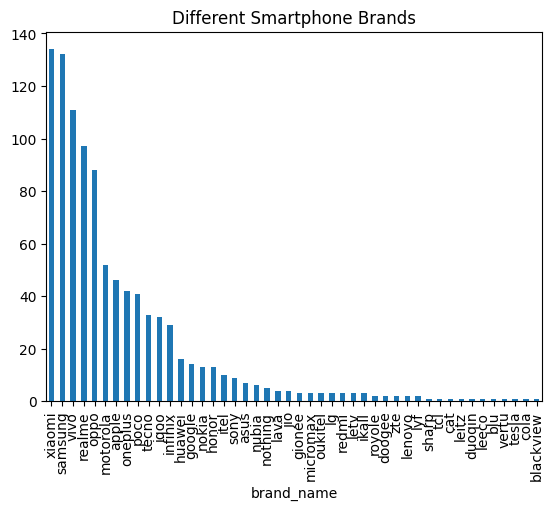

In [191]:
df['brand_name'].value_counts().plot.bar()
plt.title('Different Smartphone Brands')

## D.) Different Charging Speeds :-

Text(0.5, 1.0, 'Distribution of Charging Wattage')

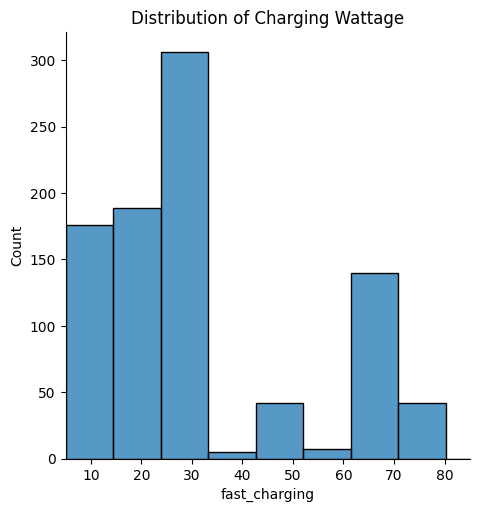

In [192]:
sns.displot(df['fast_charging'])
plt.xlim(5,85)
plt.title('Distribution of Charging Wattage')

## E.) Commonly offered RAM capacity :-

Text(0.5, 1.0, 'Ram Capacity Variation')

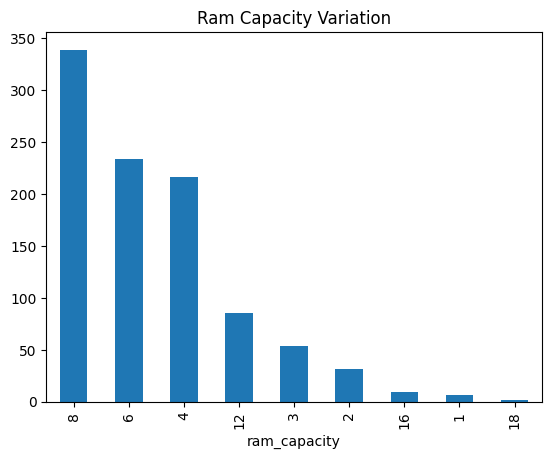

In [193]:
df['ram_capacity'].value_counts().plot.bar()
plt.title('Ram Capacity Variation')

## F.) Most commonly used Processor Brand :-

Text(0.5, 1.0, 'Different Processor Brands')

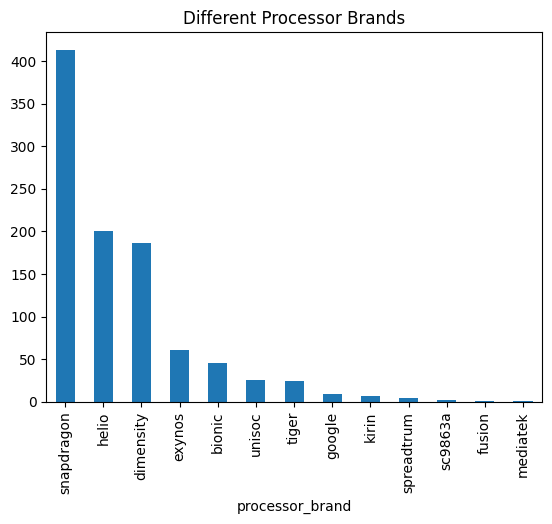

In [194]:
df['processor_brand'].value_counts().plot.bar()
plt.title('Different Processor Brands')

## G.) Processor Speed Distribution :-

Text(0.5, 1.0, "Distribution of Processor's Speed")

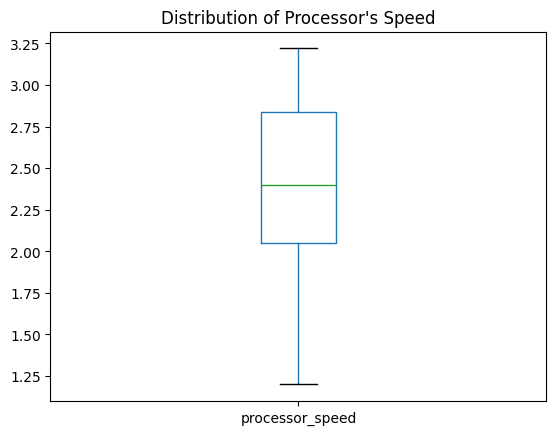

In [195]:
df.boxplot(column='processor_speed',grid=False)
plt.title("Distribution of Processor's Speed")

# 2. Bivariate Analysis

## A.) Analysis of Price vs Charging Wattage relation :-

<Axes: xlabel='price', ylabel='fast_charging'>

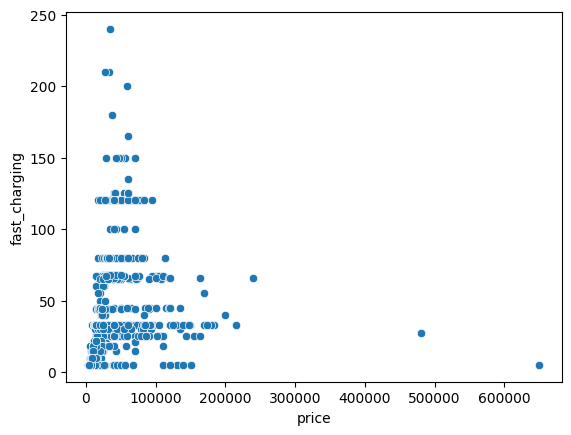

In [196]:
sns.scatterplot(data = df,x="price",y="fast_charging")

# Now we will be analysing some of the biggest brands in the market using Bivariate Analysis.

## First we will extract the data of the major brands from the dataset.

In [197]:
brands_to_analyse=['samsung','apple','xiaomi','oppo','google','motorola','oneplus']
df2=df[df['brand_name'].isin(brands_to_analyse)]

## B.) Brands and their choice of processors :-

<Axes: xlabel='processor_brand', ylabel='brand_name'>

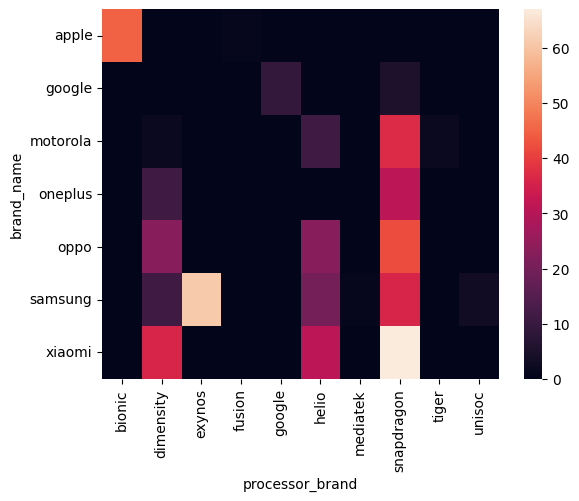

In [198]:
sns.heatmap(pd.crosstab(df2['brand_name'],df2['processor_brand']))

## C.) Brands offering fast charging :-

<Axes: xlabel='brand_name', ylabel='fast_charging_available'>

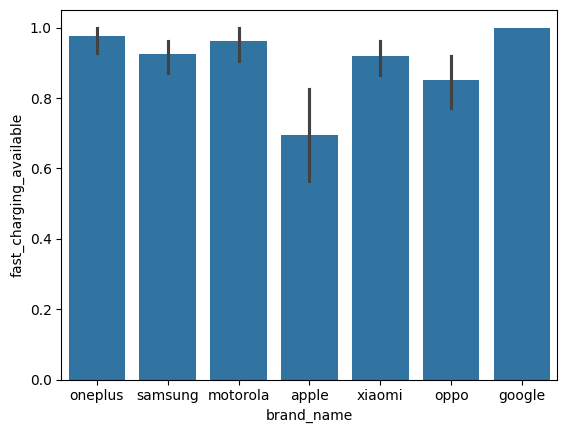

In [199]:
sns.barplot(data=df2,x="brand_name",y="fast_charging_available")

## D.) Analysing the relation between price and processor speed :-

In [200]:
# using Correlation method
x = df2['price'].to_numpy()
y = df2['processor_speed'].to_numpy()
np.corrcoef(x, y)

array([[1.        , 0.52653633],
       [0.52653633, 1.        ]])

## E.) Analysis using t-test on samsung and apple primary camera resolution :-

In [201]:
a = df2.loc[df['brand_name'] == 'samsung','primary_camera_rear'].to_numpy()
b = df2.loc[df['brand_name'] == 'apple','primary_camera_rear'].to_numpy()
stats.ttest_ind(a=a, b=b, equal_var=True)

TtestResult(statistic=6.492807636023174, pvalue=8.305618618135184e-10, df=176.0)

## F.) ANOVA on the pricing Samsung,Apple and Google :-

In [202]:
a = df2.loc[df2['brand_name'] == 'samsung', 'price'].to_numpy()
b = df2.loc[df2['brand_name'] == 'apple', 'price'].to_numpy()
c = df2.loc[df2['brand_name'] == 'google', 'price'].to_numpy()
fvalue, pvalue = stats.f_oneway(a,b,c)
print(fvalue, pvalue)

48.365422976625176 1.0906665495875795e-17


## G.) Price comparison between Samsung and Apple :-

In [203]:
brands_to_analyse1=['samsung','apple']
df3=df[df['brand_name'].isin(brands_to_analyse1)]

<Axes: xlabel='brand_name', ylabel='price'>

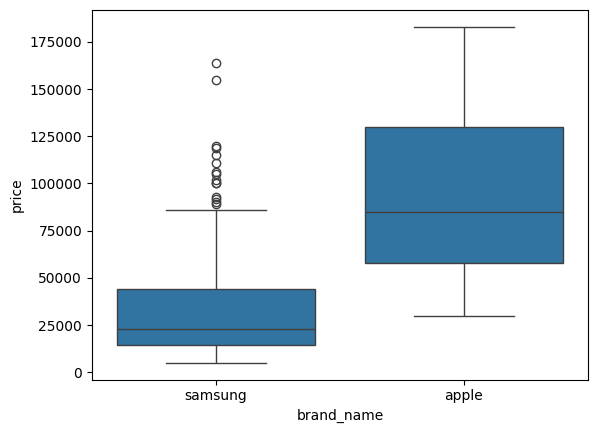

In [204]:
sns.boxplot(data=df3, x="brand_name", y="price")

## H.) A look at major Chinese brands :-

## First we will select the brands to analyse :-

In [205]:
brands_to_analyse2=['oppo','vivo','xiaomi']
df4=df[df['brand_name'].isin(brands_to_analyse2)]
columns_to_drop=['model','has_5g', 'has_nfc','refresh_rate', 'resolution',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'price_zscore','fast_charging_available','num_cores','fast_charging']
df4=df4.drop(columns=columns_to_drop)

## Price vs Internal Memory :-

<Axes: xlabel='internal_memory', ylabel='price'>

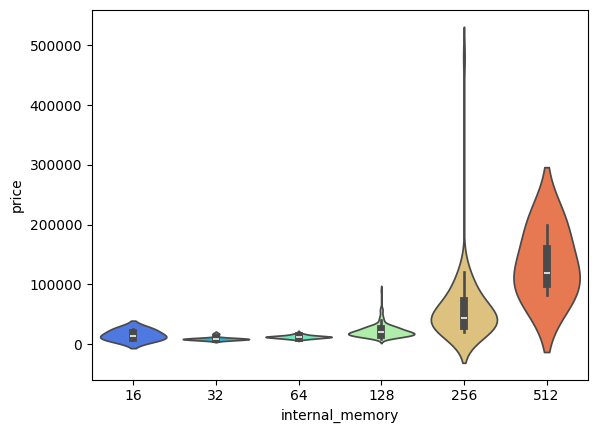

In [206]:
sns.violinplot(x='internal_memory',y='price',data=df4,palette='rainbow')

## Choice of Processor :-

<Axes: xlabel='processor_brand', ylabel='brand_name'>

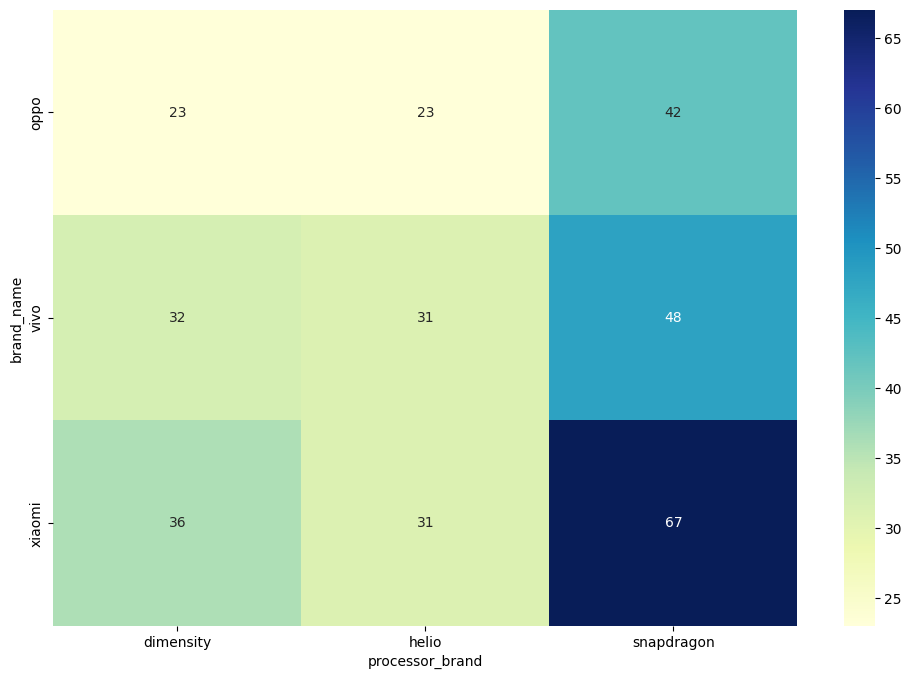

In [207]:
contigency_pct = pd.crosstab(df4['brand_name'], df4['processor_brand'])
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")

## Pricing :-

(1000.0, 65000.0)

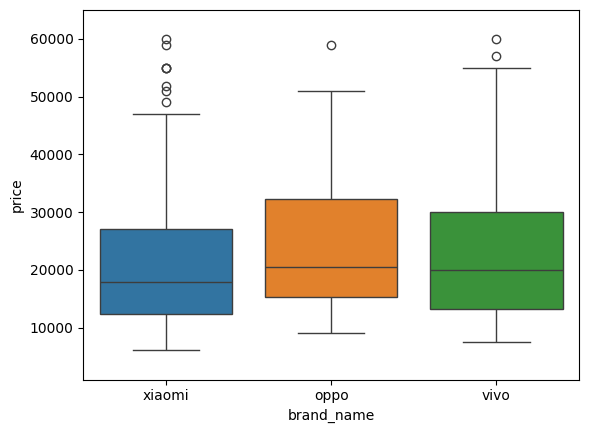

In [208]:
sns.boxplot(data=df4, x="brand_name", y="price", hue="brand_name")
plt.ylim(1000,65000)

# Conclusion :-